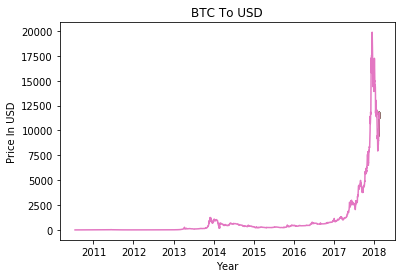

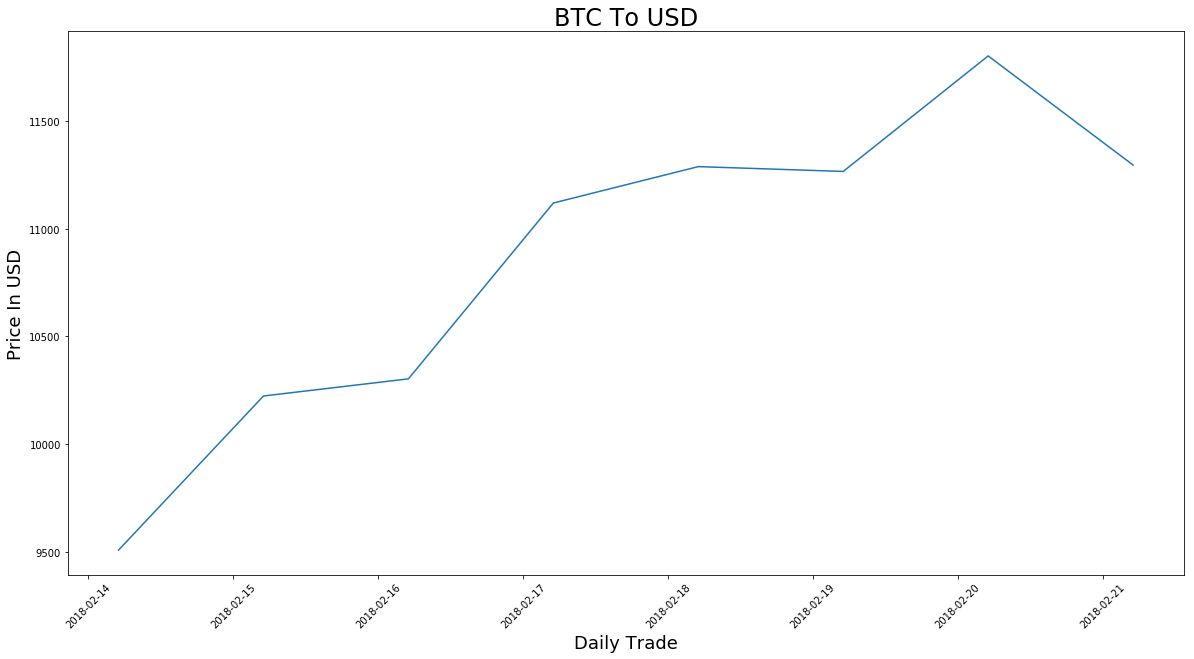

In [ ]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def daily_price_history(symbol, comparison_symbol, all_data=False, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

data = daily_price_history('BTC', 'USD', all_data=True)
plt.plot(data.timestamp, data.high)
plt.title('BTC To USD')
plt.ylabel('Price In USD')
plt.xlabel('Year')
plt.show()

def plotData (symbol="BTC", comparison_symbol="USD", all_data=False, limit=7):
    import time
    data = daily_price_history(symbol, comparison_symbol, all_data, limit)
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), comparison_symbol.upper())
    def price ():
        dt = requests.get(url).json()
        dta = {u'high': None, u'timestamp': None}
        dta['high'] = dt[comparison_symbol]
        dta['timestamp'] = datetime.datetime.now()
        return dta
    
    fig = plt.figure(figsize=(20,10))

    plt.plot(data.timestamp, data.high)
    plt.title(symbol + ' To ' + comparison_symbol, fontsize=24)
    plt.ylabel('Price In ' + comparison_symbol, fontsize=18)
    plt.xlabel('Daily Trade', fontsize=18)
    plt.xticks(rotation = 45)
    plt.show()
    
    while (True):
    
        data.append(pd.Series(price()), ignore_index=True)
        plt.plot(data.timestamp, data.high)

        time.sleep(1)

plotData()